# Importing Repositories

In [44]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

# Functions

In [45]:
def missing_zero_values_table(df): 
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [46]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [47]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [48]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price', 'Outlier']]
df_price

DateTime  Year  Month  Week  Day  Hour  Price Outlier
0     2015-01-01 00:00:00  2015      1     1    3     0   0.00       N
1     2015-01-01 01:00:00  2015      1     1    3     1   0.00       N
2     2015-01-01 02:00:00  2015      1     1    3     2   0.00       N
3     2015-01-01 03:00:00  2015      1     1    3     3   0.00       N
4     2015-01-01 04:00:00  2015      1     1    3     4   0.00       N
...                   ...   ...    ...   ...  ...   ...    ...     ...
52529 2020-12-31 18:00:00  2020     12    53    3    18  71.30       N
52530 2020-12-31 19:00:00  2020     12    53    3    19  61.04       N
52531 2020-12-31 20:00:00  2020     12    53    3    20  60.39       N
52532 2020-12-31 21:00:00  2020     12    53    3    21  57.96       N
52533 2020-12-31 22:00:00  2020     12    53    3    22  55.02       N

[52534 rows x 8 columns]

## Wind and Solar Timeseries Importing

In [49]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [50]:
df_windsolar

DateTime ProductionType  AggregatedGenerationForecast
0      2014-12-30 00:00:00          Solar                          0.00
1      2014-12-30 01:00:00          Solar                          0.00
2      2014-12-30 02:00:00          Solar                          0.00
3      2014-12-30 03:00:00          Solar                          0.00
4      2014-12-30 04:00:00          Solar                          0.00
...                    ...            ...                           ...
509107 2021-06-14 19:00:00  Wind Offshore                       1563.23
509108 2021-06-14 20:00:00  Wind Offshore                       1590.47
509109 2021-06-14 21:00:00  Wind Offshore                       1574.14
509110 2021-06-14 22:00:00  Wind Offshore                       1450.72
509111 2021-06-14 23:00:00  Wind Offshore                       1321.51

[509112 rows x 3 columns]

### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [51]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [52]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

DateTime  SolarGeneration
0      2014-12-30 00:00:00              0.0
1      2014-12-30 01:00:00              0.0
2      2014-12-30 02:00:00              0.0
3      2014-12-30 03:00:00              0.0
4      2014-12-30 04:00:00              0.0
...                    ...              ...
169699 2021-06-14 19:00:00            227.0
169700 2021-06-14 20:00:00             11.5
169701 2021-06-14 21:00:00              0.0
169702 2021-06-14 22:00:00              0.0
169703 2021-06-14 23:00:00              0.0

[169704 rows x 2 columns]

In [53]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

DateTime  WindOffGeneration
0      2014-12-30 00:00:00             996.58
1      2014-12-30 01:00:00            1059.20
2      2014-12-30 02:00:00            1123.27
3      2014-12-30 03:00:00            1177.54
4      2014-12-30 04:00:00            1188.21
...                    ...                ...
169699 2021-06-14 19:00:00            1563.23
169700 2021-06-14 20:00:00            1590.47
169701 2021-06-14 21:00:00            1574.14
169702 2021-06-14 22:00:00            1450.72
169703 2021-06-14 23:00:00            1321.51

[169704 rows x 2 columns]

In [54]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

DateTime  WindOnGeneration
0      2014-12-30 00:00:00           2363.80
1      2014-12-30 01:00:00           2413.88
2      2014-12-30 02:00:00           2450.75
3      2014-12-30 03:00:00           2500.78
4      2014-12-30 04:00:00           2536.07
...                    ...               ...
169699 2021-06-14 19:00:00           4896.71
169700 2021-06-14 20:00:00           3928.19
169701 2021-06-14 21:00:00           3277.03
169702 2021-06-14 22:00:00           2880.91
169703 2021-06-14 23:00:00           2492.04

[169704 rows x 2 columns]

## Total Load Timeseries Importing

In [55]:
f_totalload = glob.glob(path_totalload + "/*.csv")
dtotalload = [pd.read_csv(f, encoding='utf-16', sep='\t', parse_dates=['DateTime']) for f in f_totalload]

df_totalload = pd.concat(dtotalload)
df_totalload = df_totalload[df_totalload['AreaCode'] == '10YGB----------A']
df_totalload = df_totalload[['DateTime', 'TotalLoadValue']]
df_totalload.reset_index(drop=True, inplace=True)


In [56]:
df_totalload.sort_values(by=['DateTime'], ascending=True)
df_totalload.reset_index(drop=True, inplace=True)
df_totalload

DateTime  TotalLoadValue
0      2014-12-29 00:00:00         28798.0
1      2014-12-29 02:00:00         29534.0
2      2014-12-29 00:30:00         29961.0
3      2014-12-29 02:30:00         29627.0
4      2014-12-29 04:30:00         26717.0
...                    ...             ...
202693 2020-09-30 14:30:00         34726.0
202694 2020-09-30 16:30:00         36430.0
202695 2020-09-30 18:30:00         36366.0
202696 2020-09-30 20:30:00         29449.0
202697 2020-09-30 22:30:00         22858.0

[202698 rows x 2 columns]

# Merging Datasets

In [57]:
df_price = df_price[df_price['Outlier'] == 'N']
df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')

In [58]:
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)

In [59]:
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

Price  Year  Month  Day  Hour  SolarGeneration  \
DateTime                                                              
2015-01-01 00:00:00   0.00  2015      1    3     0              0.0   
2015-01-01 01:00:00   0.00  2015      1    3     1              0.0   
2015-01-01 02:00:00   0.00  2015      1    3     2              0.0   
2015-01-01 03:00:00   0.00  2015      1    3     3              0.0   
2015-01-01 04:00:00   0.00  2015      1    3     4              0.0   
...                    ...   ...    ...  ...   ...              ...   
2020-12-31 18:00:00  71.30  2020     12    3    18              0.0   
2020-12-31 19:00:00  61.04  2020     12    3    19              0.0   
2020-12-31 20:00:00  60.39  2020     12    3    20              0.0   
2020-12-31 21:00:00  57.96  2020     12    3    21              0.0   
2020-12-31 22:00:00  55.02  2020     12    3    22              0.0   

                     WindOffGeneration  WindOnGeneration  
DateTime                                                  
2015-01-01 00:00:00            2987.05           4013.58  
2015-01-01 01:00:00            2926.71           4074.53  
2015-01-01 02:00:00            2867.00           4157.48  
2015-01-01 03:00:00            2808.72           4229.50  
2015-01-01 04:00:00            2769.59           4133.56  
...                                ...               ...  
2020-12-31 18:00:00            2644.97           3028.41  
2020-12-31 19:00:00            2707.55           3046.72  
2020-12-31 20:00:00            2695.01           3053.60  
2020-12-31 21:00:00            2829.57           3086.61  
2020-12-31 22:00:00            2886.83           3116.99  

[49990 rows x 8 columns]

## Lag Creation

In [120]:
# Daily Lags

df_model['Solar Daily lag'] = df_model['SolarGeneration'].shift(23)
df_model['Wind onshore Daily lag'] = df_model['WindOnGeneration'].shift(23)
df_model['Wind offshore Daily lag'] = df_model['WindOffGeneration'].shift(23)

# Weekly Lags

df_model['Solar Weekly lag'] = df_model['SolarGeneration'].shift(161)
df_model['Wind offshore Weekly lag'] = df_model['WindOffGeneration'].shift(161)
df_model['Wind onshore Weekly lag'] = df_model['WindOnGeneration'].shift(161)

In [121]:
df_model

Price  Year  Month  Day  Hour  SolarGeneration  \
DateTime                                                              
2015-01-15 14:00:00   0.00  2015      1    3    14            665.0   
2015-01-15 15:00:00   0.00  2015      1    3    15            592.0   
2015-01-15 16:00:00   0.00  2015      1    3    16            316.0   
2015-01-15 17:00:00   0.00  2015      1    3    17             40.0   
2015-01-15 18:00:00   0.00  2015      1    3    18              0.0   
...                    ...   ...    ...  ...   ...              ...   
2020-12-31 18:00:00  71.30  2020     12    3    18              0.0   
2020-12-31 19:00:00  61.04  2020     12    3    19              0.0   
2020-12-31 20:00:00  60.39  2020     12    3    20              0.0   
2020-12-31 21:00:00  57.96  2020     12    3    21              0.0   
2020-12-31 22:00:00  55.02  2020     12    3    22              0.0   

                     WindOffGeneration  WindOnGeneration  Solar Daily lag  \
DateTime                                                                    
2015-01-15 14:00:00            2697.51           5248.15              NaN   
2015-01-15 15:00:00            2614.17           5159.07              NaN   
2015-01-15 16:00:00            2329.44           4984.73              NaN   
2015-01-15 17:00:00            2326.18           4452.62              NaN   
2015-01-15 18:00:00            1909.11           3887.07              NaN   
...                                ...               ...              ...   
2020-12-31 18:00:00            2644.97           3028.41            290.0   
2020-12-31 19:00:00            2707.55           3046.72              0.0   
2020-12-31 20:00:00            2695.01           3053.60              0.0   
2020-12-31 21:00:00            2829.57           3086.61              0.0   
2020-12-31 22:00:00            2886.83           3116.99              0.0   

                     Wind onshore Daily lag  Wind offshore Daily lag  \
DateTime                                                               
2015-01-15 14:00:00                     NaN                      NaN   
2015-01-15 15:00:00                     NaN                      NaN   
2015-01-15 16:00:00                     NaN                      NaN   
2015-01-15 17:00:00                     NaN                      NaN   
2015-01-15 18:00:00                     NaN                      NaN   
...                                     ...                      ...   
2020-12-31 18:00:00                 1530.89                  1687.64   
2020-12-31 19:00:00                 1710.55                  1205.95   
2020-12-31 20:00:00                 1711.78                  1119.02   
2020-12-31 21:00:00                 1716.47                  1077.68   
2020-12-31 22:00:00                 1768.69                  1011.51   

                     Solar Weekly Lag  WindOff Weekly Lag  WindOn Weekly Lag  \
DateTime                                                                       
2015-01-15 14:00:00               0.0             2948.70            4394.74   
2015-01-15 15:00:00               0.0             2856.10            4377.54   
2015-01-15 16:00:00              14.0             2671.64            4346.08   
2015-01-15 17:00:00              43.0             2423.26            4338.31   
2015-01-15 18:00:00             217.0             2392.32            4334.64   
...                               ...                 ...                ...   
2020-12-31 18:00:00               0.0             8303.44            3116.92   
2020-12-31 19:00:00               0.0             8019.25            2799.31   
2020-12-31 20:00:00               0.0             7677.20            2470.25   
2020-12-31 21:00:00               0.0             7307.71            2289.64   
2020-12-31 22:00:00               0.0             6952.33            2168.03   

                     Solar Weekly lag  WindOff Weekly lag  WindOn Weekly lag  \
DateTime                             

In [122]:
missing_zero_values_table(df_model)

Our selected dataframe has 19 columns and 49597 Rows.
There are 6 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
Solar Weekly lag                21353             161                0.3   
Wind offshore Weekly lag            0             161                0.3   
Wind onshore Weekly lag             0             161                0.3   
Solar Daily lag                 21442              23                0.0   
Wind onshore Daily lag              0              23                0.0   
Wind offshore Daily lag             0              23                0.0   

                          Total Zero Missing Values  \
Solar Weekly lag                              21514   
Wind offshore Weekly lag                        161   
Wind onshore Weekly lag                         161   
Solar Daily lag                               21465   
Wind onshore Daily lag                           23   
Wind offshore Daily lag                          23   

                          % Total Zero Missing Values Data Type  
Solar Weekly lag                                 43.4   float64  
Wind offshore Weekly lag                          0.3   float64  
Wind onshore Weekly lag                           0.3   float64  
Solar Daily lag                                  43.3   float64  
Wind onshore Daily lag                            0.0   float64  
Wind offshore Daily lag                           0.0   float64

In [123]:
df_model.dropna(inplace=True)

In [124]:
df_model

Price  Year  Month  Day  Hour  SolarGeneration  \
DateTime                                                              
2015-01-22 16:00:00  53.03  2015      1    3    16            284.0   
2015-01-22 19:00:00  46.00  2015      1    3    19              0.0   
2015-01-22 20:00:00  42.05  2015      1    3    20              0.0   
2015-01-22 21:00:00  36.97  2015      1    3    21              0.0   
2015-01-22 22:00:00  35.91  2015      1    3    22              0.0   
...                    ...   ...    ...  ...   ...              ...   
2020-12-31 18:00:00  71.30  2020     12    3    18              0.0   
2020-12-31 19:00:00  61.04  2020     12    3    19              0.0   
2020-12-31 20:00:00  60.39  2020     12    3    20              0.0   
2020-12-31 21:00:00  57.96  2020     12    3    21              0.0   
2020-12-31 22:00:00  55.02  2020     12    3    22              0.0   

                     WindOffGeneration  WindOnGeneration  Solar Daily lag  \
DateTime                                                                    
2015-01-22 16:00:00             459.04           1014.39            153.0   
2015-01-22 19:00:00             474.30           1532.82              0.0   
2015-01-22 20:00:00             469.47           1709.40              0.0   
2015-01-22 21:00:00             471.94           1872.09              0.0   
2015-01-22 22:00:00             440.69           1982.03              0.0   
...                                ...               ...              ...   
2020-12-31 18:00:00            2644.97           3028.41            290.0   
2020-12-31 19:00:00            2707.55           3046.72              0.0   
2020-12-31 20:00:00            2695.01           3053.60              0.0   
2020-12-31 21:00:00            2829.57           3086.61              0.0   
2020-12-31 22:00:00            2886.83           3116.99              0.0   

                     Wind onshore Daily lag  Wind offshore Daily lag  \
DateTime                                                               
2015-01-22 16:00:00                  865.35                   471.20   
2015-01-22 19:00:00                  905.41                   462.97   
2015-01-22 20:00:00                  889.01                   411.99   
2015-01-22 21:00:00                  878.97                   357.65   
2015-01-22 22:00:00                  878.71                   317.93   
...                                     ...                      ...   
2020-12-31 18:00:00                 1530.89                  1687.64   
2020-12-31 19:00:00                 1710.55                  1205.95   
2020-12-31 20:00:00                 1711.78                  1119.02   
2020-12-31 21:00:00                 1716.47                  1077.68   
2020-12-31 22:00:00                 1768.69                  1011.51   

                     Solar Weekly Lag  WindOff Weekly Lag  WindOn Weekly Lag  \
DateTime                                                                       
2015-01-22 16:00:00             665.0             2697.51            5248.15   
2015-01-22 19:00:00             592.0             2614.17            5159.07   
2015-01-22 20:00:00             316.0             2329.44            4984.73   
2015-01-22 21:00:00              40.0             2326.18            4452.62   
2015-01-22 22:00:00               0.0             1909.11            3887.07   
...                               ...                 ...                ...   
2020-12-31 18:00:00               0.0             8303.44            3116.92   
2020-12-31 19:00:00               0.0             8019.25            2799.31   
2020-12-31 20:00:00               0.0             7677.20            2470.25   
2020-12-31 21:00:00               0.0             7307.71            2289.64   
2020-12-31 22:00:00               0.0             6952.33            2168.03   

                     Solar Weekly lag  WindOff Weekly lag  WindOn Weekly lag  \
DateTime                             

## Investigate correlation within the lags

### Daily Lags

<AxesSubplot:xlabel='WindOnGeneration', ylabel='Wind onshore Daily lag'>

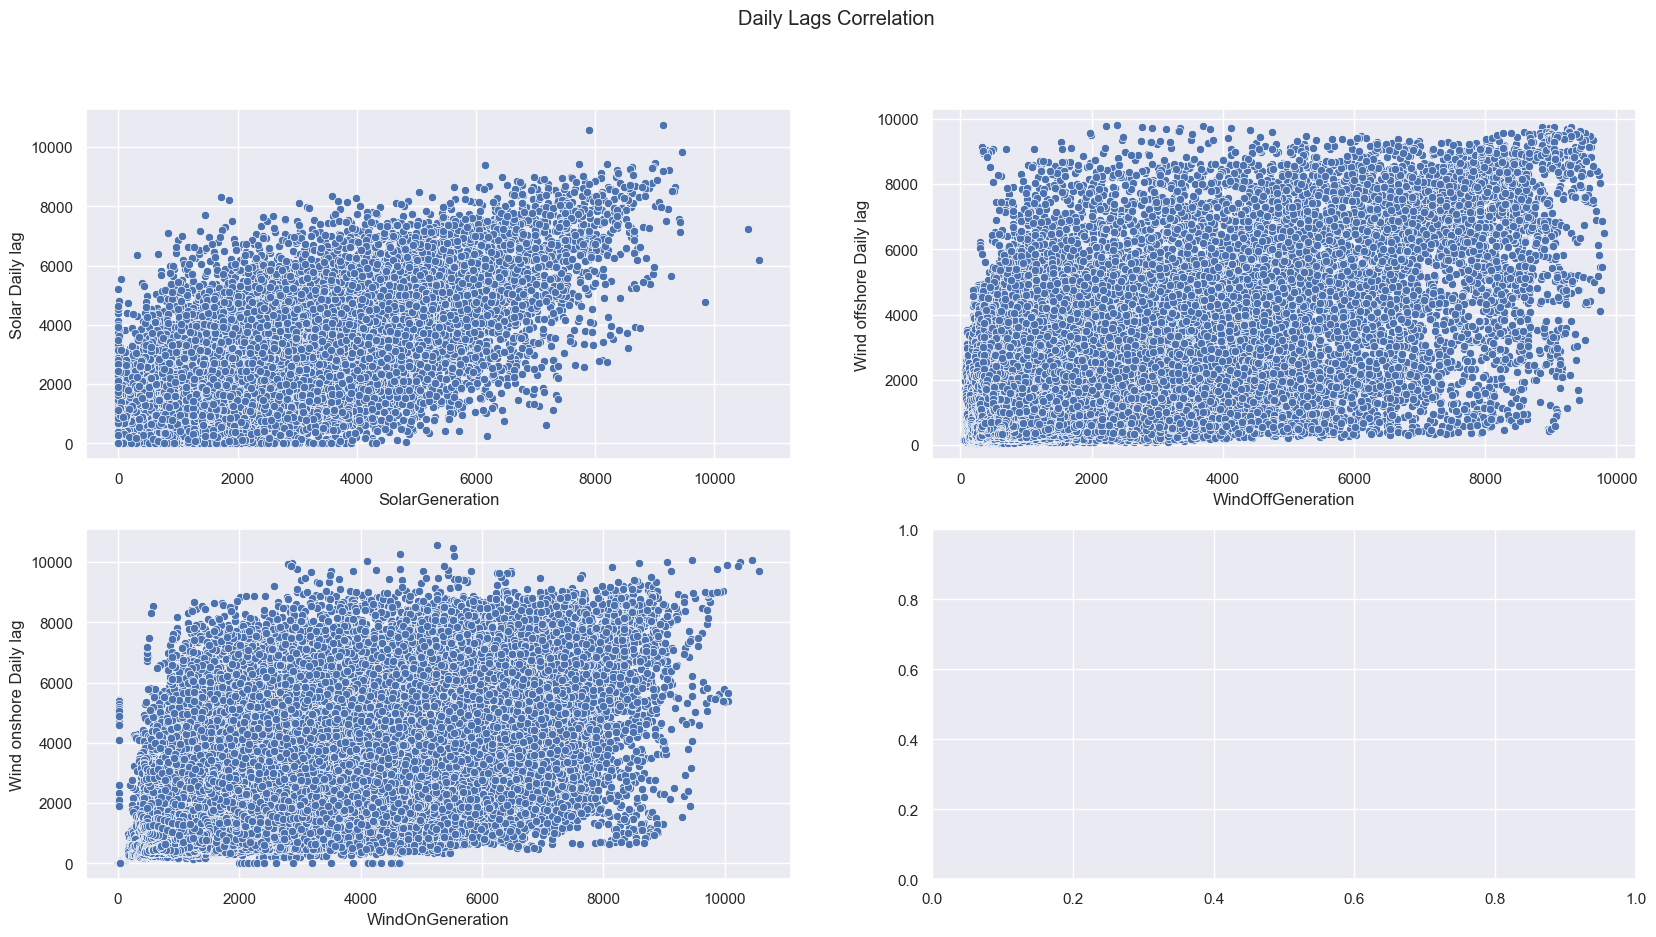

In [130]:
fig , axs = plt.subplots(2,2)
fig.suptitle("Daily Lags Correlation")
sns.scatterplot(x=df_model['SolarGeneration'], y=df_model['Solar Daily lag'], ax=axs[0,0])
sns.scatterplot(x=df_model['WindOffGeneration'], y=df_model['Wind offshore Daily lag'], ax=axs[0,1])
sns.scatterplot(x=df_model['WindOnGeneration'], y=df_model['Wind onshore Daily lag'], ax=axs[1,0])


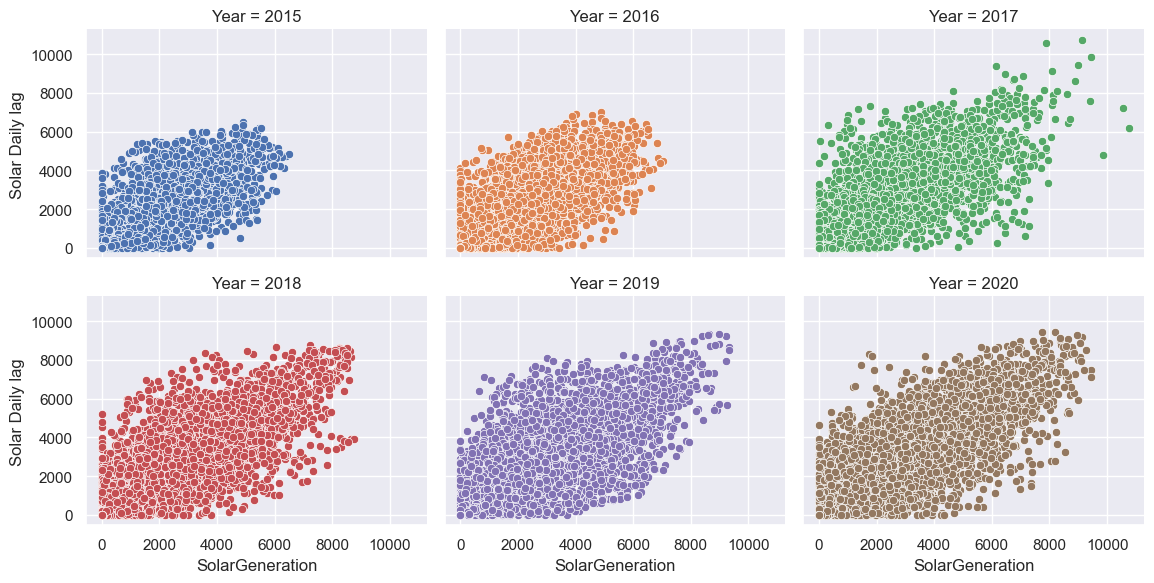

In [131]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "SolarGeneration", "Solar Daily lag")

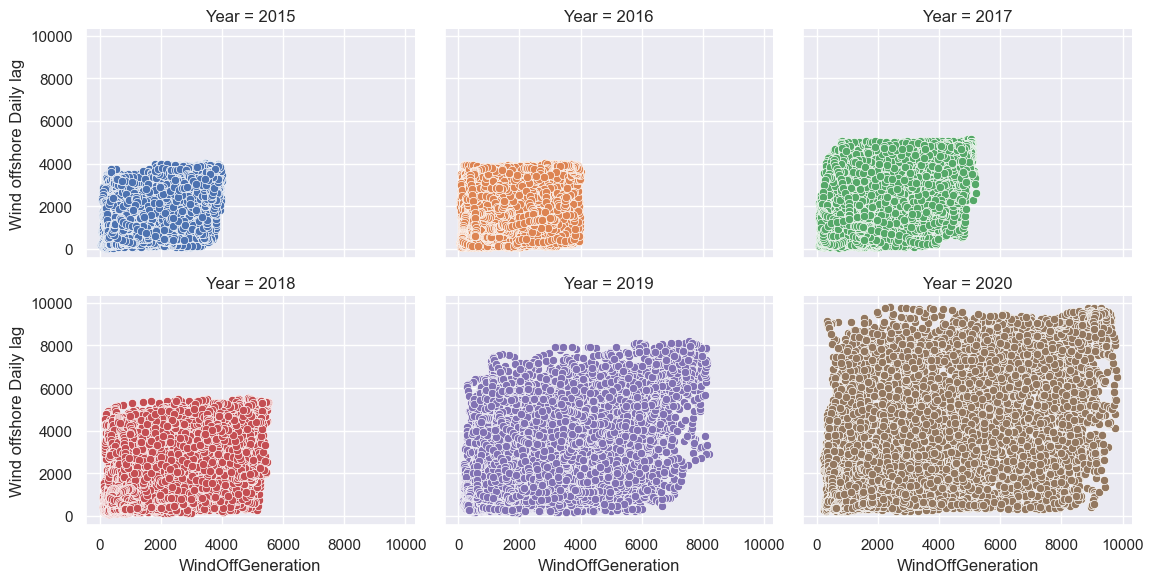

In [132]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "WindOffGeneration", "Wind offshore Daily lag")

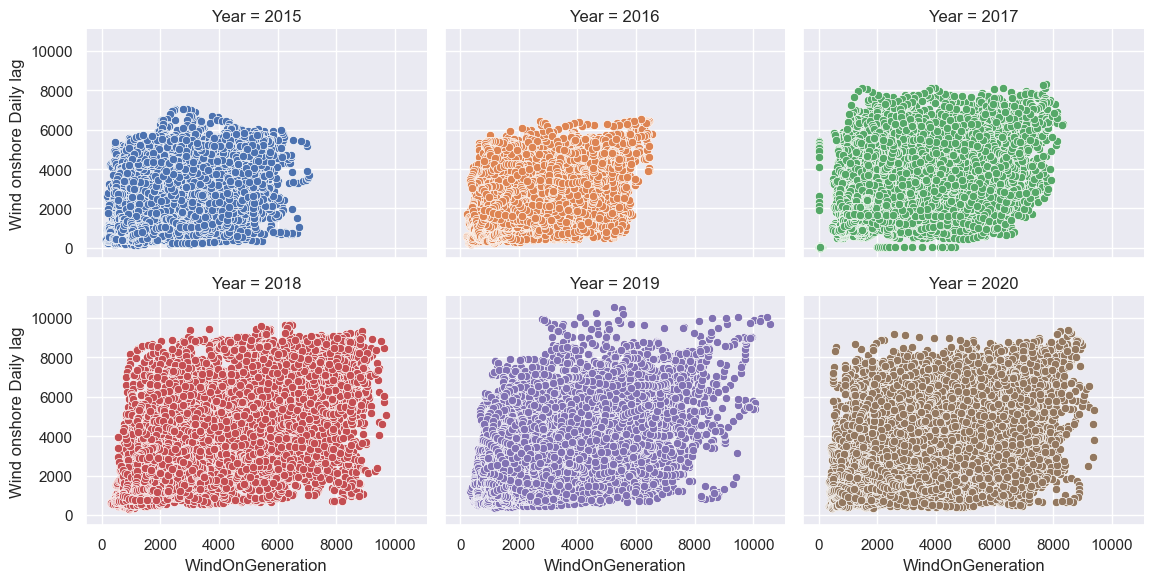

In [133]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "WindOnGeneration", "Wind onshore Daily lag")

### Weekly Lags

<AxesSubplot:xlabel='WindOnGeneration', ylabel='Wind onshore Weekly lag'>

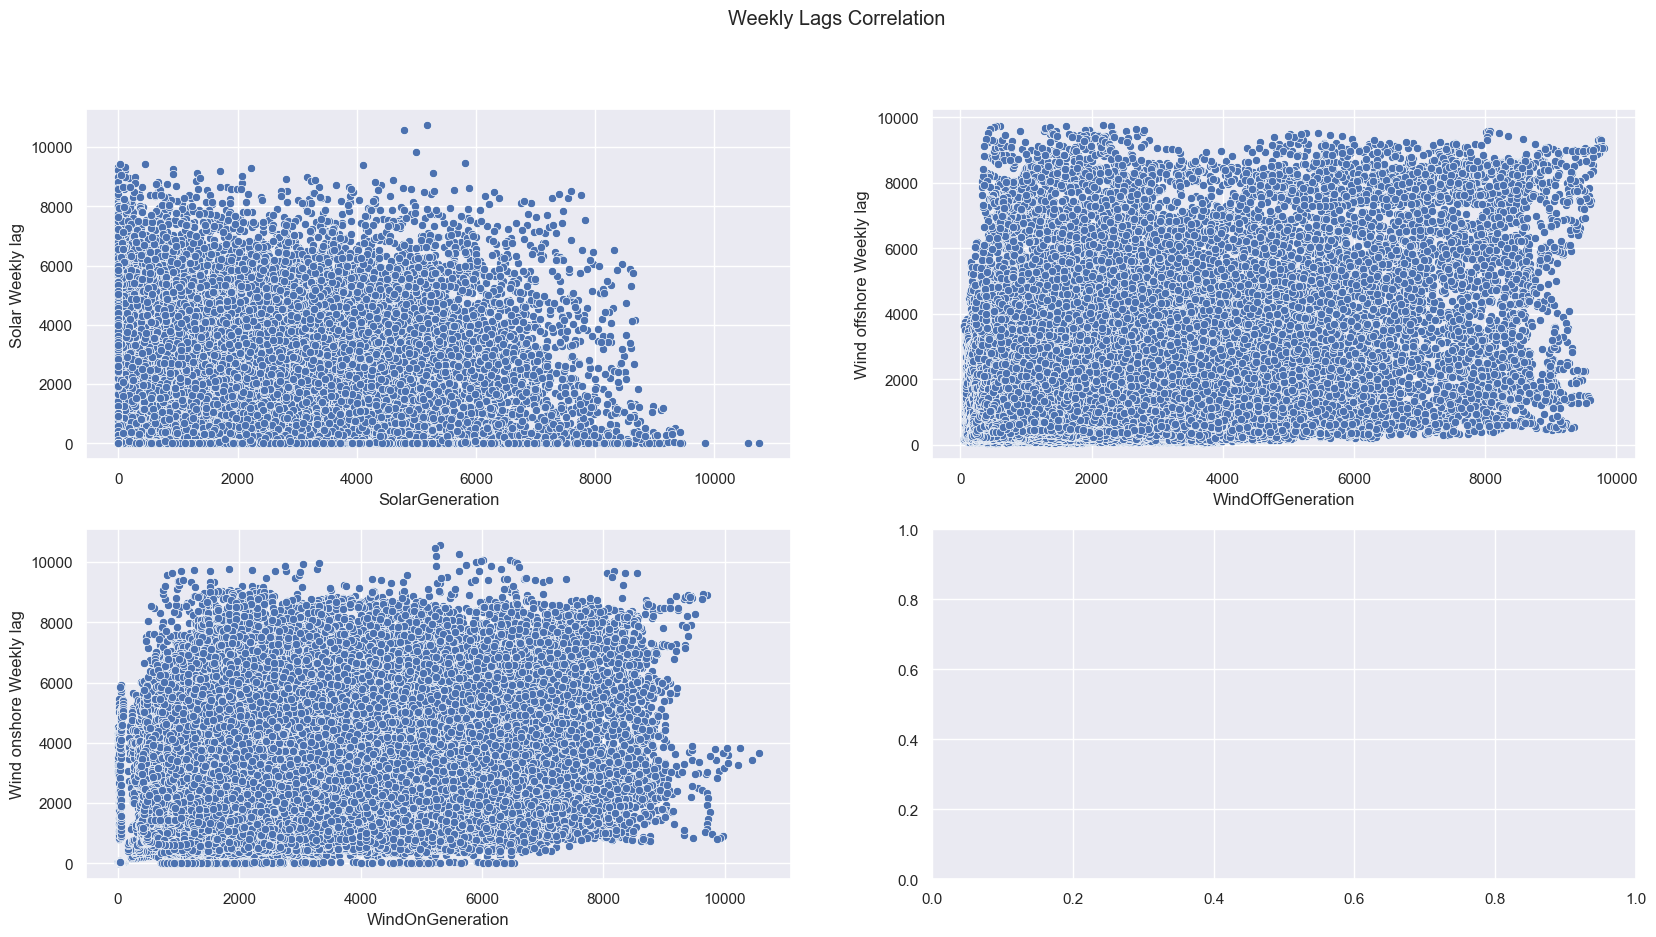

In [134]:
fig , axs = plt.subplots(2,2)
fig.suptitle("Weekly Lags Correlation")
sns.scatterplot(x=df_model['SolarGeneration'], y=df_model['Solar Weekly lag'], ax=axs[0,0])
sns.scatterplot(x=df_model['WindOffGeneration'], y=df_model['Wind offshore Weekly lag'], ax=axs[0,1])
sns.scatterplot(x=df_model['WindOnGeneration'], y=df_model['Wind onshore Weekly lag'], ax=axs[1,0])


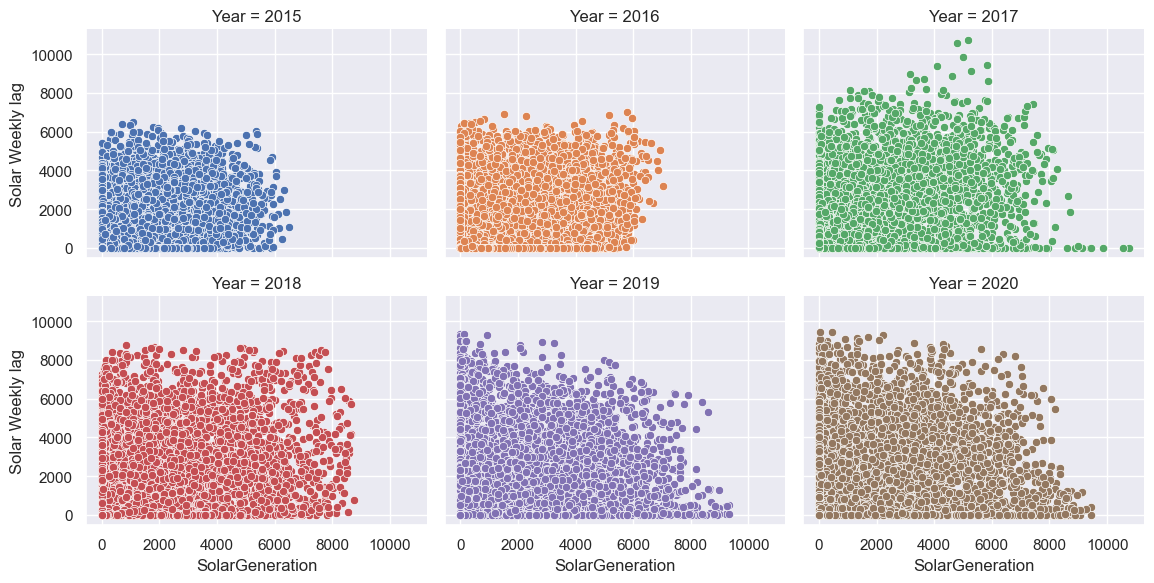

In [135]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "SolarGeneration", "Solar Weekly lag")

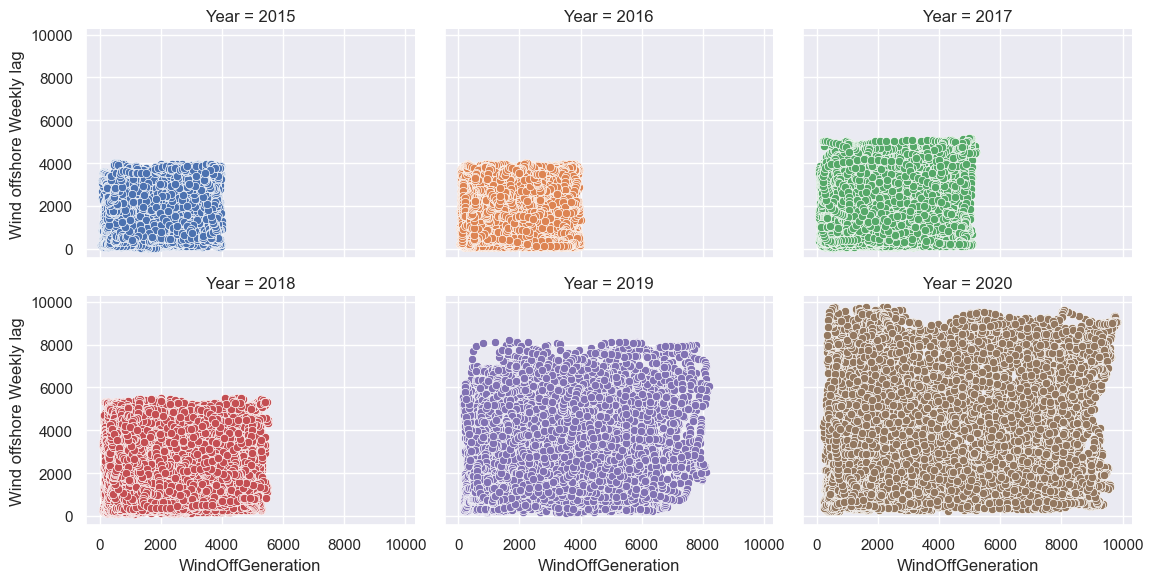

In [136]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "WindOffGeneration", "Wind offshore Weekly lag")

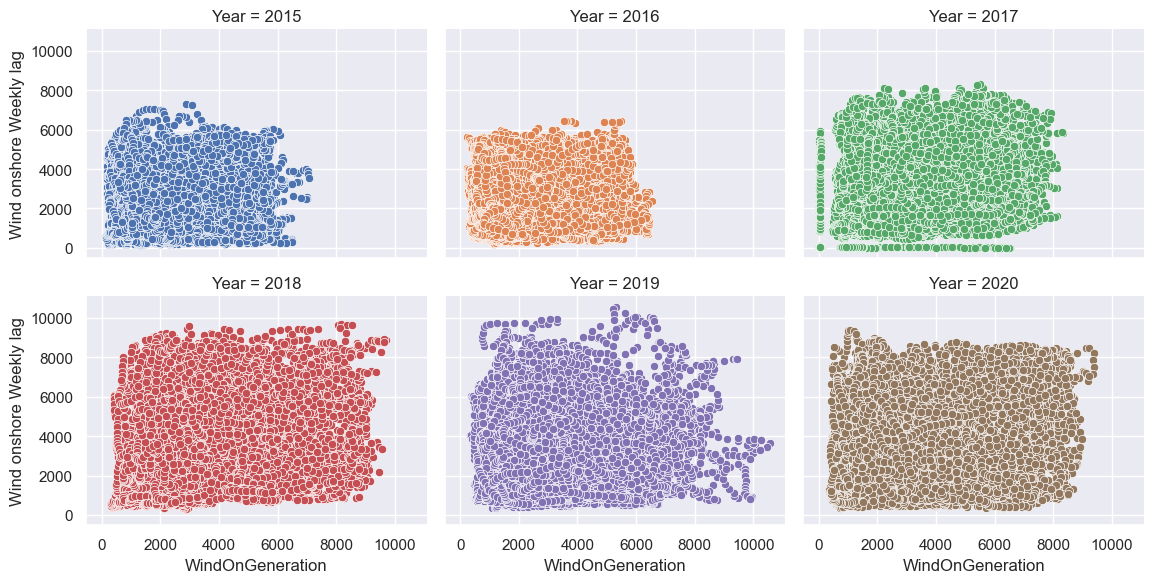

In [137]:
ax = sns.FacetGrid(df_model, col='Year', hue='Year', aspect=1.3, col_wrap=3)
ax.map(sns.scatterplot, "WindOnGeneration", "Wind onshore Weekly lag")